# 3. 趋势理论_均线篇
*用Python量化你的技术分析*

## 目录
- 均线是什么？
- 不同均线是怎么计算的？
- 均线如何用图表显示？
- 如何用均线构建策略？

## 均线是什么？
均线理论是当今应用最普遍的技术指标之一，它帮助交易者确认现有趋势、判断将出现的趋势、发现过度延生即将反转的趋势。另外均线与趋势是西蒙斯被TED采访时提到的关键词，因此做量化你必须懂，而且是深入地懂这两个词的真正意义。

## 不同均线是怎么计算的？
---

### 1. Simple Moving Average 平滑价格

$MA_n=\frac{X_1+X_2+...X_n}{n}$

---

### 2. Weighted Moving Average 用权重方法突出前段

$W_t=\frac{w_1P_{t-n+1}+w_2P_{t-n+2}+...+w_{n-1}P_{t-1}+w_nP_t}{w_1+w_2+...+w_n}$

$w_1<w_2<...<w_n$

---

### 3. Triangular Moving Average 突出中间,用于周期分析

$TMA_5=\frac{P_1+2P_2+3P_3+2P_4+P_5}{9}$

---

### 4. Exponential Moving Average 用指数方法突出前段

$EMA_t=\frac{a^nP_{t-n+1}+a^{n-1}P_{t-n+2}+...+a^2P_{t-1}+aP_t}{a^n+a^{n-1}+...+a^2+a}$

$EMA_t=α*Price_t + ( 1 - α ) * EMA_{t-1}$

$α为平滑指数，一般取作2/(n+1)$

---

### 5. Double Exponential Moving Average 突出EMA,减少滞后。

$DEMA = 2*EMA-EMA(EMA)$

---

### 6. Kaufman Adaptive Moving Average 自适应自适应市场变化与波动

$ER = Change/Volatility$

$Change = ABS(Close - Close (10 periods ago))$

$Volatility = Sum_{10}(ABS(Close_t - Close_{t-1}))$

$\text{Volatility is the sum of the absolute value of the last ten price changes (Close - Prior Close)}$

$SC = [ER * (fastest SC - slowest SC) + slowest SC]^2$

$SC = [ER * (2/(2+1) - 2/(30+1)) + 2/(30+1)]^2$

$Current KAMA = Prior KAMA + SC * (Price - KAMA_{t-1})$



## 均线如何用图表显示？


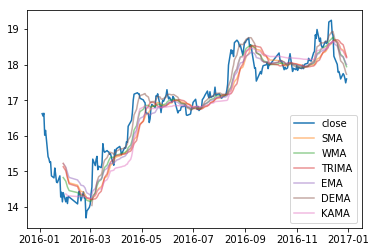

In [1]:
import talib as ta
import tushare as ts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = ts.get_k_data('600036', start='2016-01-01', end='2016-12-31', ktype='D',autype='qfq')
data.index = pd.to_datetime(data['date'],format='%Y-%m-%d')

data['SMA'] = ta.abstract.MA(data, 20)
data['WMA'] = ta.abstract.WMA(data, 20)
data['TRIMA'] = ta.abstract.TRIMA(data, 20)
data['EMA']  = ta.abstract.EMA(data, 20)
data['DEMA'] = ta.abstract.DEMA(data, 20)
data['KAMA'] = ta.abstract.KAMA(data, 20)

plt.plot(data['close'])
plt.plot(data['SMA'], alpha=0.5)
plt.plot(data['WMA'], alpha=0.5)
plt.plot(data['TRIMA'], alpha=0.5)
plt.plot(data['EMA'], alpha=0.5)
plt.plot(data['DEMA'], alpha=0.5)
plt.plot(data['KAMA'], alpha=0.5)
plt.legend(loc='lower right')
plt.show()

## 如何用均线构建策略？
**两条均线的三种交易方法**
1. 当均线金叉（短期大于长期均线）时候买进，死叉（短期小于长期）时卖出。 
2. 当价格上穿两条均线时买入，但价格下穿其中一条均线时卖出。 
3. 当两条均线都处于向上方向时买入，当两条均线都处于下跌方向时卖出。

In [2]:
#计算数据：
data['EMA10'] = ta.abstract.EMA(data, 10)
data['EMA40'] = ta.abstract.EMA(data, 40)

print data.tail()

                  date   open  close   high    low    volume    code      SMA  \
date                                                                            
2016-12-26  2016-12-26  17.56  17.75  17.77  17.39  163431.0  600036  18.4085   
2016-12-27  2016-12-27  17.73  17.71  17.82  17.65  100907.0  600036  18.3565   
2016-12-28  2016-12-28  17.72  17.62  17.77  17.49  267871.0  600036  18.3100   
2016-12-29  2016-12-29  17.60  17.49  17.62  17.43  284391.0  600036  18.2600   
2016-12-30  2016-12-30  17.53  17.60  17.61  17.47  227259.0  600036  18.2155   

                  WMA      TRIMA        EMA       DEMA       KAMA      EMA10  \
date                                                                           
2016-12-26  18.223714  18.560182  18.211823  18.032451  18.380665  18.011561   
2016-12-27  18.157190  18.489818  18.164030  17.958500  18.331090  17.956732   
2016-12-28  18.087048  18.407364  18.112218  17.879384  18.284140  17.895508   
2016-12-29  18.008952  18.315636

In [3]:
buy_time=[]
buy_price=[]

sell_time=[]
sell_price=[]

data = data.dropna()
it = data.iterrows()
t0, p0 = next(it)
pos = 0

print t0, p0

2016-03-04 00:00:00 date       2016-03-04
open            14.55
close          15.347
high           15.395
low            14.434
volume    1.64468e+06
code           600036
SMA           14.2661
WMA           14.3099
TRIMA         14.2201
EMA           14.4521
DEMA          14.2532
KAMA          14.2952
EMA10         14.4323
EMA40         14.7456
Name: 2016-03-04 00:00:00, dtype: object


In [4]:
#当价格上穿两条均线时买入，当价格下穿其中一条均线时卖出。

for t1, p1 in it:
    if  pos == 0 and p1.close > p0.EMA10 and p1.close > p0.EMA40 and (p0.close < p0.EMA40 or p0.close < p0.EMA10):
        buy_time.append(t1)
        buy_price.append(p1.close)
        pos = 1
    elif pos == 1 and (p1.close < p0.EMA10 or p1.close < p0.EMA40) :
        sell_time.append(t1)
        sell_price.append(p1.close)
        pos = 0
    t0, p0 = t1, p1

print 'buy_time:', len(buy_time)
print 'buy_price', len(buy_price)
print 'sell_time', len(sell_time)
print 'sell_price', len(sell_price)

buy_time: 19
buy_price 19
sell_time 19
sell_price 19


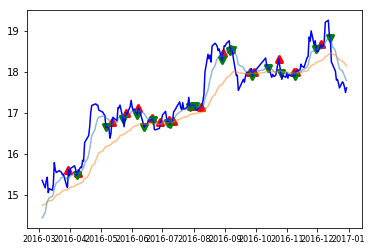

In [5]:
import matplotlib as mpl
mpl.rc('xtick', labelsize=8)
plt.plot(data['close'], c='b')
plt.plot(data['EMA10'], alpha=0.5)
plt.plot(data['EMA40'], alpha=0.5)
plt.scatter(buy_time, buy_price, c='r', marker='^', linewidths=3)
plt.scatter(sell_time, sell_price, c='g', marker='v', linewidths=3)
plt.show()

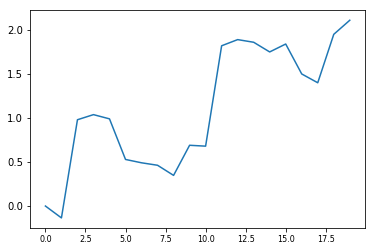

In [6]:
#收益绩效显示

import numpy as np
money = np.array(sell_price) - np.array(buy_price)
money = list(money)
money.insert(0,0)
money = np.array(money)
capital = money.cumsum()
plt.plot(capital)
plt.show()

## 作业：
将另外两个策略参考以上代码完成图形。